In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [4]:
import zipfile
import os

with zipfile.ZipFile("/content/drive/MyDrive/GENAI/Week5/Day5/Dogs vs Cats.zip", 'r') as zip_ref:
    zip_ref.extractall("Dogs vs Cats")

1. Preprocess the Data:

In [5]:
import os
import shutil

train_dir = r"/content/Dogs vs Cats/train/train"
cat_dir = os.path.join(train_dir, 'cat')
dog_dir = os.path.join(train_dir, 'dog')

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

for filename in os.listdir(train_dir):
    file_path = os.path.join(train_dir, filename)
    if os.path.isfile(file_path):
        if filename.startswith('cat'):
            shutil.move(file_path, os.path.join(cat_dir, filename))
        elif filename.startswith('dog'):
            shutil.move(file_path, os.path.join(dog_dir, filename))


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = r"/content/Dogs vs Cats/train/train"
IMG_HEIGHT = 150
IMG_WIDTH = 150
batch_size = 32


train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


2. Build the Model:

In [7]:
cnn = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ["accuracy"]
)

3. Train the Model:

In [18]:
from tensorflow.keras.models import load_model

cnn = load_model('/content/drive/MyDrive/model_epoch_05.h5')

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
tf.config.run_functions_eagerly(True)

checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/model_epoch_{epoch:02d}.h5',
    save_weights_only=False,
    save_best_only=False,
    verbose=1
)

history = cnn.fit(
    train_data_gen,
    validation_data=val_data_gen,
    initial_epoch=5,
    epochs=15,
    callbacks=[checkpoint_callback]
)

Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7683 - loss: 0.4841

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 6: saving model to /content/drive/MyDrive/model_epoch_06.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 235ms/step - accuracy: 0.7683 - loss: 0.4841 - val_accuracy: 0.7968 - val_loss: 0.4484
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.7723 - loss: 0.4721
Epoch 7: saving model to /content/drive/MyDrive/model_epoch_07.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 235ms/step - accuracy: 0.7723 - loss: 0.4721 - val_accuracy: 0.7964 - val_loss: 0.4496
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.7875 - loss: 0.4529
Epoch 8: saving model to /content/drive/MyDrive/model_epoch_08.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - accuracy: 0.7875 - loss: 0.4529 - val_accuracy: 0.7986 - val_loss: 0.4299
Epoch 9/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.7960 - loss: 0.4424
Epoch 9: saving model to /content/drive/MyDrive/model_epoch_09.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 233ms/step - accuracy: 0.7960 - loss: 0.4424 - val_accuracy: 0.8140 - val_loss: 0.4066
Epoch 10/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8049 - loss: 0.4181
Epoch 10: saving model to /content/drive/MyDrive/model_epoch_10.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 234ms/step - accuracy: 0.8048 - loss: 0.4181 - val_accuracy: 0.8174 - val_loss: 0.4201
Epoch 11/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.8149 - loss: 0.4074
Epoch 11: saving model to /content/drive/MyDrive/model_epoch_11.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 233ms/step - accuracy: 0.8149 - loss: 0.4074 - val_accuracy: 0.8298 - val_loss: 0.3798
Epoch 12/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8182 - loss: 0.4028
Epoch 12: saving model to /content/drive/MyDrive/model_epoch_12.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8182 - loss: 0.4028 - val_accuracy: 0.8310 - val_loss: 0.3796
Epoch 13/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8316 - loss: 0.3860
Epoch 13: saving model to /content/drive/MyDrive/model_epoch_13.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8316 - loss: 0.3860 - val_accuracy: 0.8418 - val_loss: 0.3555
Epoch 14/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.8310 - loss: 0.3792
Epoch 14: saving model to /content/drive/MyDrive/model_epoch_14.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8310 - loss: 0.3792 - val_accuracy: 0.8044 - val_loss: 0.4447
Epoch 15/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8317 - loss: 0.3758
Epoch 15: saving model to /content/drive/MyDrive/model_epoch_15.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 232ms/step - accuracy: 0.8317 - loss: 0.3758 - val_accuracy: 0.8520 - val_loss: 0.3398


# **4. Evaluate the Model:**

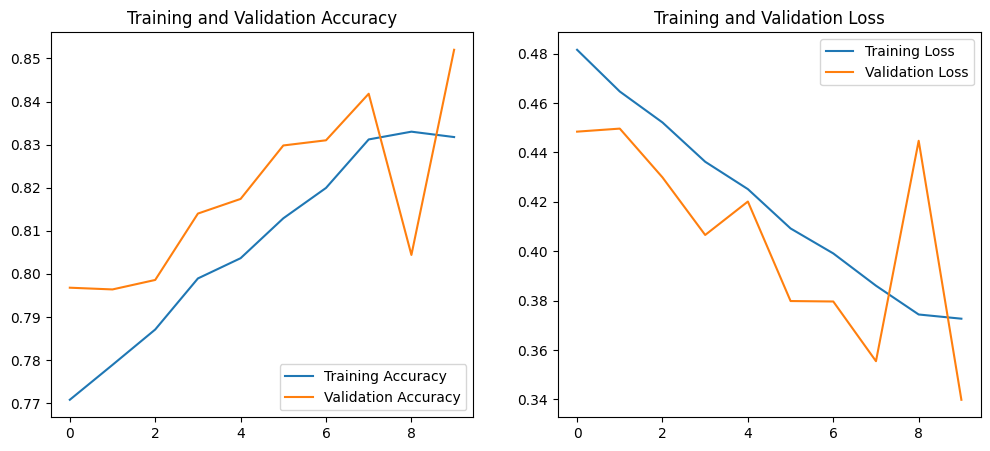

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

L’augmentation de données et le dropout améliorent la performance d’un modèle en réduisant le surapprentissage. L’augmentation de données enrichit le jeu d’entraînement en créant des images modifiées (rotations, zooms, symétries), ce qui permet au modèle d’apprendre à généraliser à partir de données variées. Le dropout, quant à lui, désactive aléatoirement des neurones pendant l’entraînement, forçant le réseau à apprendre des représentations plus robustes et moins dépendantes de certains chemins. Ensemble, ces deux techniques renforcent la capacité du modèle à bien se comporter sur des données nouvelles, en améliorant sa généralisation.